Realizar as etapas do codigo de regressão linear apresentados na aula 08 no notion

In [4]:

import numpy as np                      # Geração de dados numéricos
import matplotlib.pyplot as plt         # Gráficos
import pandas as pd                     # Organização de resultados
from sklearn.linear_model import LinearRegression          # Regressão Linear
from sklearn.metrics import mean_squared_error, r2_score   # Métricas de avaliação


In [5]:
def treinar_regressao(X, y, titulo):
    modelo = LinearRegression()             # Cria o modelo de regressão linear
    modelo.fit(X, y)                        # Treina o modelo com os dados
    y_pred = modelo.predict(X)             # Faz as previsões

    mse = mean_squared_error(y, y_pred)     # Calcula o erro quadrático médio
    r2 = r2_score(y, y_pred)                # Calcula o coeficiente de determinação R²

    plt.figure(figsize=(8, 4))

    # Verifica se é regressão simples (1 variável) ou múltipla (>1)
    if X.shape[1] == 1:
        plt.scatter(X, y, color='blue', label='Dados reais')
        plt.plot(X, y_pred, color='red', label='Reta de regressão')
        plt.xlabel('X')
        plt.ylabel('y')
    else:
        plt.plot(y, label='Valor real', marker='o')
        plt.plot(y_pred, label='Valor previsto', marker='x')
        plt.xlabel('Índice da amostra')
        plt.ylabel('y / y_pred')

    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'modelo': modelo,
        'MSE': mse,
        'R2': r2,
        'coef': modelo.coef_,
        'intercept': modelo.intercept_
    }


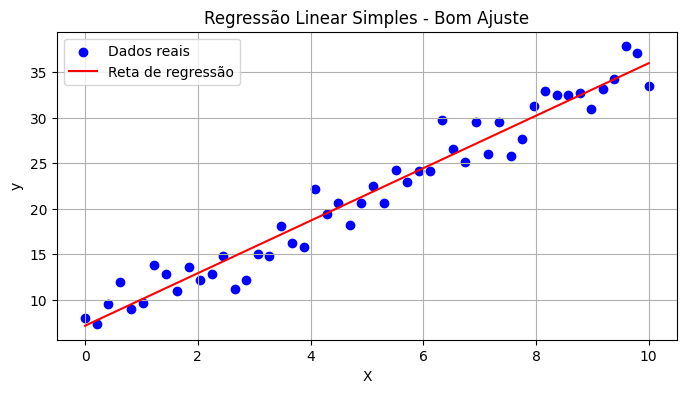

In [6]:
# Garante que os resultados sejam reproduzíveis
np.random.seed(42)

# Gera 50 valores de x entre 0 e 10
X1 = np.linspace(0, 10, 50)

# Cria y com base em uma função linear + ruído leve
y1 = 3 * X1 + 7 + np.random.normal(0, 2, 50)

# Ajusta X para o formato que o scikit-learn espera: (n_amostras, n_features)
X1 = X1.reshape(-1, 1)

# Aplica a função criada anteriormente
res_bom_simples = treinar_regressao(X1, y1, "Regressão Linear Simples - Bom Ajuste")


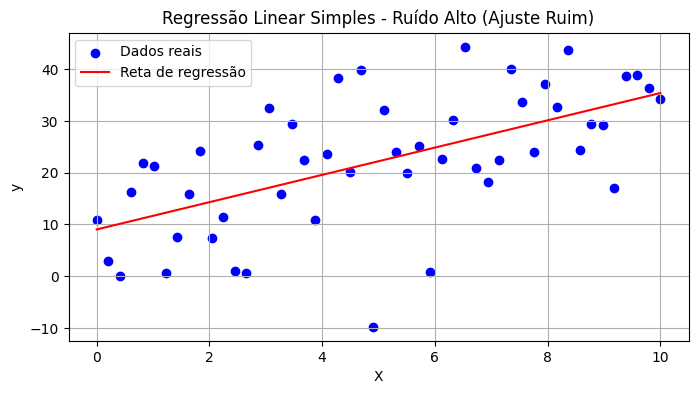

In [7]:
# Gera dados com muito ruído
X2 = np.linspace(0, 10, 50)
y2 = 3 * X2 + 7 + np.random.normal(0, 12, 50)  # Aumenta o ruído

# Ajusta para o formato adequado
X2 = X2.reshape(-1, 1)

# Treina o modelo e plota
res_ruim_simples = treinar_regressao(X2, y2, "Regressão Linear Simples - Ruído Alto (Ajuste Ruim)")


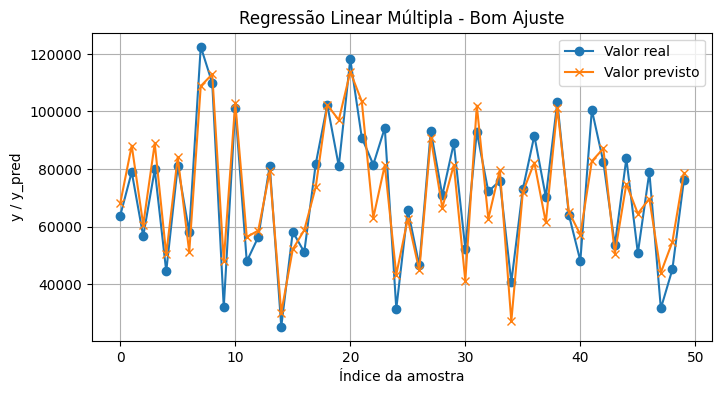

In [8]:
# Garante reprodutibilidade
np.random.seed(0)

# Variável 1: tamanho do imóvel em m² (0 a 100)
X3_1 = np.random.rand(50) * 100

# Variável 2: número de quartos (entre 1 e 4)
X3_2 = np.random.randint(1, 5, 50)

# Variável dependente: preço do imóvel
y3 = 500 * X3_1 + 10000 * X3_2 + 20000 + np.random.normal(0, 10000, 50)

# Junta as duas variáveis em uma matriz (50 linhas, 2 colunas)
X3 = np.column_stack((X3_1, X3_2))

# Treina o modelo
res_bom_multipla = treinar_regressao(X3, y3, "Regressão Linear Múltipla - Bom Ajuste")


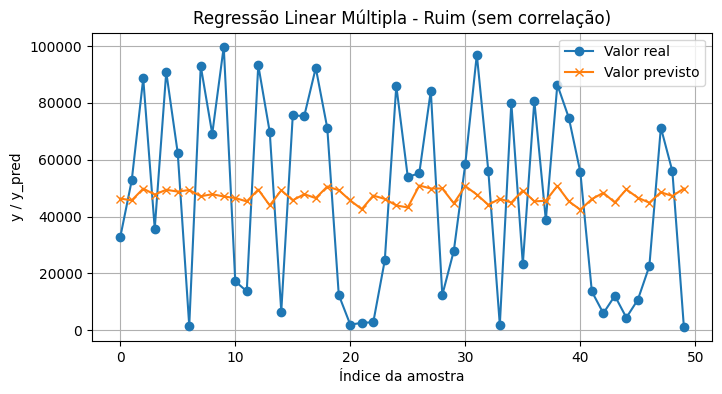

In [9]:
# Garante reprodutibilidade
np.random.seed(1)

# Variáveis totalmente aleatórias
X4_1 = np.random.rand(50) * 100
X4_2 = np.random.rand(50) * 100

# Saída aleatória (sem relação com X)
y4 = np.random.rand(50) * 100000

# Junta as variáveis
X4 = np.column_stack((X4_1, X4_2))

# Treina e plota
res_ruim_multipla = treinar_regressao(X4, y4, "Regressão Linear Múltipla - Ruim (sem correlação)")


In [10]:
# Cria um DataFrame com os resultados dos modelos
df_resultados = pd.DataFrame({
    "Exemplo": [
        "Simples - Bom Ajuste", 
        "Simples - Ruído Alto", 
        "Múltipla - Bom Ajuste", 
        "Múltipla - Sem Correlação"
    ],
    "MSE": [
        res_bom_simples['MSE'], 
        res_ruim_simples['MSE'], 
        res_bom_multipla['MSE'], 
        res_ruim_multipla['MSE']
    ],
    "R²": [
        res_bom_simples['R2'], 
        res_ruim_simples['R2'], 
        res_bom_multipla['R2'], 
        res_ruim_multipla['R2']
    ]
})

# Exibe a tabela
df_resultados


,Exemplo,MSE,R²
0,Simples - Bom Ajuste,3.300567e+00,0.956251
1,Simples - Ruído Alto,1.067184e+02,0.360615
2,Múltipla - Bom Ajuste,7.802214e+07,0.855344
3,Múltipla - Sem Correlação,1.093889e+09,0.004652
